In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



In [ ]:
DATA_DIR = "../../data2/processed"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
VAL_DIR = os.path.join(DATA_DIR, "val")

IMG_SIZE = (64, 64)
BATCH_SIZE = 32
NUM_CLASSES = 6

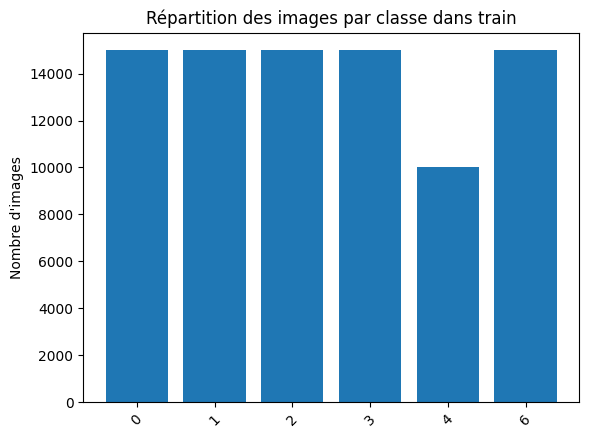

{'0': 15000, '1': 15000, '2': 15000, '3': 15000, '4': 10000, '6': 15000}


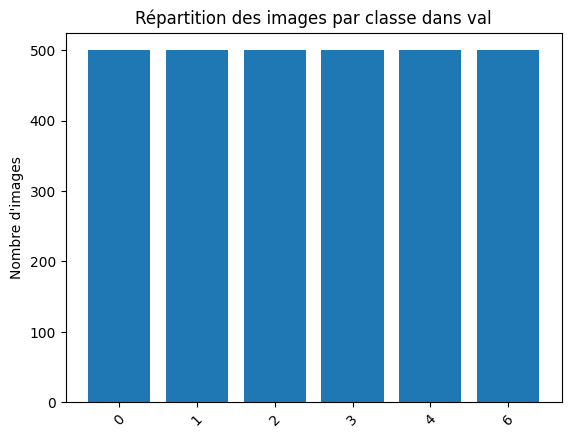

{'0': 500, '1': 500, '2': 500, '3': 500, '4': 500, '6': 500}


In [3]:
data_path = "../../data2/processed/train"
class_counts = {class_name: len(os.listdir(os.path.join(data_path, class_name))) for class_name in os.listdir(data_path)}

plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.ylabel("Nombre d'images")
plt.title("Répartition des images par classe dans train")
plt.show()

print(class_counts)

data_path = "../../data2/processed/val"
class_counts = {class_name: len(os.listdir(os.path.join(data_path, class_name))) for class_name in os.listdir(data_path)}

plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.ylabel("Nombre d'images")
plt.title("Répartition des images par classe dans val")
plt.show()

print(class_counts)

In [5]:
# Création des générateurs de données
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

CLASSES = ['0', '1', '2', '3', '4', '6']

train_generator = train_datagen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    classes=CLASSES,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    directory=VAL_DIR,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    classes=CLASSES,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 85000 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


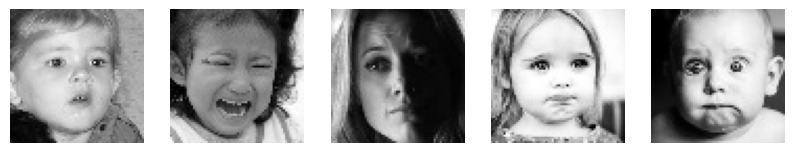

In [8]:
images, labels = next(train_generator)
plt.figure(figsize=(10, 5))
for i in range(5): 
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.show()


In [12]:
model = Sequential([
    InputLayer(input_shape=(64, 64, 1)),
    
    # Bloc 1
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    # Bloc 2
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    # Bloc 3
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    # Bloc 4
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6)

# Entraînement
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50
2657/2657 [==============================] - 74s 25ms/step - loss: 1.6686 - accuracy: 0.2977 - val_loss: 1.4992 - val_accuracy: 0.3773 - lr: 0.0010
Epoch 2/50
2657/2657 [==============================] - 57s 21ms/step - loss: 1.4674 - accuracy: 0.3918 - val_loss: 1.3946 - val_accuracy: 0.4227 - lr: 0.0010
Epoch 3/50
2657/2657 [==============================] - 48s 18ms/step - loss: 1.3495 - accuracy: 0.4554 - val_loss: 1.3065 - val_accuracy: 0.4933 - lr: 0.0010
Epoch 4/50
2657/2657 [==============================] - 36s 14ms/step - loss: 1.2275 - accuracy: 0.5274 - val_loss: 1.1485 - val_accuracy: 0.5417 - lr: 0.0010
Epoch 5/50
2657/2657 [==============================] - 37s 14ms/step - loss: 1.1232 - accuracy: 0.5726 - val_loss: 1.1239 - val_accuracy: 0.5417 - lr: 0.0010
Epoch 6/50
2657/2657 [==============================] - 37s 14ms/step - loss: 1.0557 - accuracy: 0.5976 - val_loss: 1.0942 - val_accuracy: 0.5687 - lr: 0.0010
Epoch 7/50
2657/2657 [========================

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

94/94 [==============================] - 1s 12ms/step - loss: 1.0128 - accuracy: 0.6273
Test Accuracy: 0.63


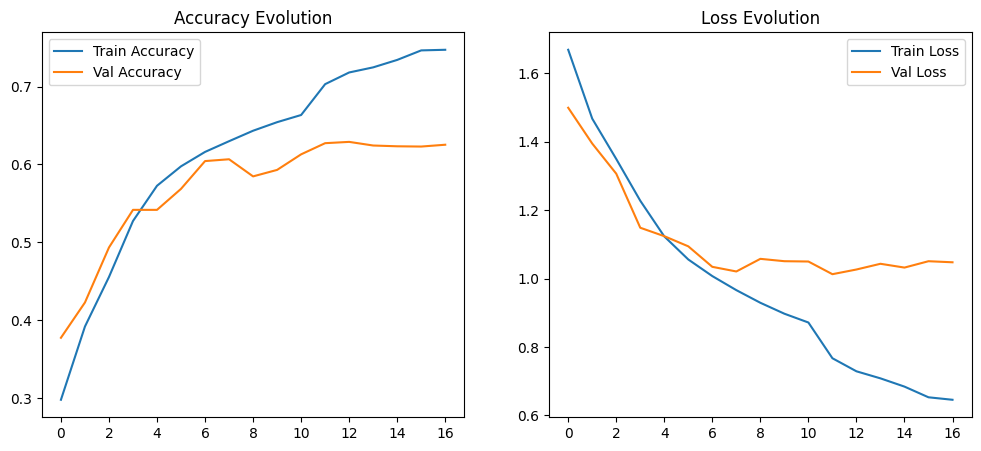

In [15]:
# 🔹 Évaluation
test_loss, test_acc = model.evaluate(val_generator)
print(f"Test Accuracy: {test_acc:.2f}")

# 🔹 Courbes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Evolution')

plt.show()

1/1 [==============================] - 0s 76ms/step


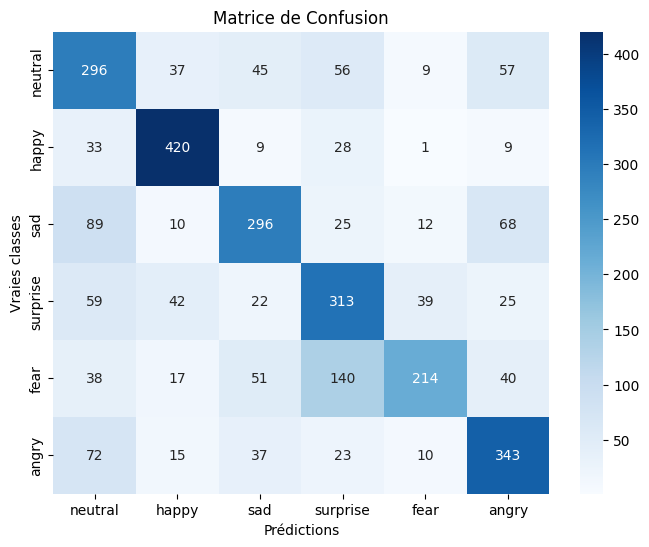

Classification Report:
              precision    recall  f1-score   support

     neutral       0.50      0.59      0.54       500
       happy       0.78      0.84      0.81       500
         sad       0.64      0.59      0.62       500
    surprise       0.54      0.63      0.58       500
        fear       0.75      0.43      0.55       500
       angry       0.63      0.69      0.66       500

    accuracy                           0.63      3000
   macro avg       0.64      0.63      0.62      3000
weighted avg       0.64      0.63      0.62      3000



In [ ]:

y_true = []
y_pred = []

for batch in val_generator:
    X_batch, y_batch = batch
    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred.extend(np.argmax(model.predict(X_batch), axis=1))

    if len(y_true) >= val_generator.samples:
        break

class_labels = list(val_generator.class_indices.keys())
label_names = ["neutral", "happy", "sad", "surprise", "fear", "angry"]

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de Confusion")
plt.show()



# 🔹 Rapport détaillé des performances
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_names))

In [18]:
model.save("scratch_d2_63_nb.h5")